In [141]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(x_train, y_train),(x_test, y_test)=mnist.load_data()
x_test_old = x_test
x_train_old = x_train

plot = lambda tensor: plt.imshow(tensor, cmap=plt.cm.binary)


In [49]:
# label
print(y_train[8])

1


In [25]:
print("samples, height, width")
print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)

(60000, 28, 28)
3
uint8


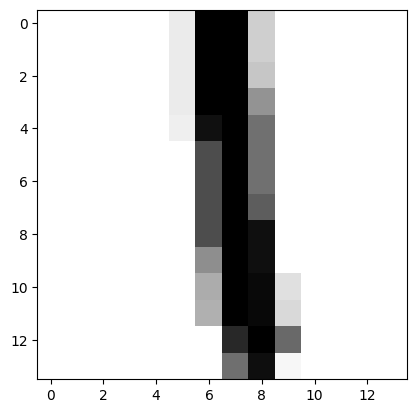

In [81]:
# selecciona todos elementos(:) dentro de los vectores del 0 al 99 (0:99)
sample = x_train[0:99, :]
#### también se podría escribir así, uno por cada dimensión
# sample = x_train[0:99, 0:28, 0:28]
#### todas las muestras, pero solo la esquina inferior derecha
right_below= x_train[:, 14:, 14:]
#### todas las muestras pero solo el centro
center= x_train[:, 7:-7, 7:-7]
plot(center[8])

## Data normalization

In [147]:
# no se suelen usar datos con valores más grandes que los pesos (etiquetas, labels, que este caso van de 0 a 9, así que lo pasamos a números entre 0 y 1)
x_train= x_train_old.astype("float32")
x_test= x_test_old.astype("float32")

x_train /= 255
x_test /= 255

# las redes neuronales aceptan como entradas tensores de una sola dimensión, 
# así que cambiamos la forma de (60000, 28, 28) a (60000, 784, 784) ### 784 = 28x28
x_train= x_train.reshape(60000, 784)
x_test= x_test.reshape(10000, 784)

In [150]:
# label for the first item 
print(y_test[0])
print(y_train[0])
print(y_train.shape)
print(y_test.shape)

# one hot decoding
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train, num_classes=10)
y_test=to_categorical(y_test, num_classes=10)

print("#"*10)
print("convert integer into binary class matrix")
print("#"*10)

print(y_test[0])
print(y_train[0])
print(y_train.shape)
print(y_test.shape)

7
5
(60000,)
(10000,)
##########
convert integer into binary class matrix
##########
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)
(10000, 10)


## Neuronal network creation

In [96]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
#capas densamente conectadas
model = Sequential()
#activation layer with sigmoid function
# 10 valores de probabilidad (neuronas, probabilidad de que la entrada sea 0,1,2...) función de activación y la forma del input
model.add(Dense(10, activation="sigmoid", input_shape=(784,), name="sigmoid"))
#activation layer with softmax function
# 10 neuronas, una por cada dígito posibe
model.add(Dense(10, activation="softmax", name="softmax"))


model.summary()
# in softmax layer, there is 110 params because: 
# it requires 10 x 10 neurons (10 of the softmax layer itself and 10 of the sigmoid layer) + 10 bias params

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sigmoid (Dense)             (None, 10)                7850      
                                                                 
 softmax (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


## Model training

In [97]:
# calculate precision (images that are labeled correctly)
# loss function, optimizer is stocastic gradient descent (sdg) and we just measure accuracy
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [151]:
print(x_train.shape)
print(y_train.shape) 
model.fit(x_train, y_train, epochs=5)
# epochs = number of imes we will use these daa in learning process
# the loss value should be smaller on each iteration
# this uses the training model we provided with "model.compile"
# "why is it 1875 instead of 60000" here is why: https://stackoverflow.com/questions/61122276/keras-not-training-on-entire-dataset"

(60000, 784)
(60000, 10)
Epoch 1/5
1875/1875 [==============================] - 1s 487us/step - loss: 0.3376 - accuracy: 0.9097
Epoch 2/5
1875/1875 [==============================] - 1s 512us/step - loss: 0.3329 - accuracy: 0.9105
Epoch 3/5
1875/1875 [==============================] - 1s 502us/step - loss: 0.3284 - accuracy: 0.9117
Epoch 4/5
1875/1875 [==============================] - 1s 497us/step - loss: 0.3243 - accuracy: 0.9126
Epoch 5/5
1875/1875 [==============================] - 1s 501us/step - loss: 0.3205 - accuracy: 0.9136


## Model evaluation

In [152]:
test_loss, test_acc = model.evaluate(x_test, y_test)

# accuracy vs recall metrics, research
# we can use scikit learn to calculate these metrics

313/313 [==============================] - 0s 420us/step - loss: 0.3176 - accuracy: 0.9138


## Prediction generation

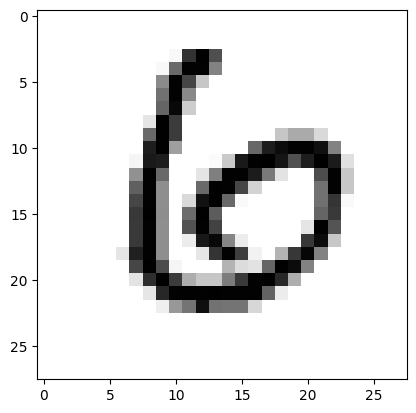

In [106]:
plot(x_test_old[11])

In [126]:
predictions= model.predict(x_test)

313/313 [==============================] - 0s 360us/step


In [155]:
import numpy as np
# what number is it based on the highest probability, and the highest probability is on index 6 
np.argmax(predictions[11])
print(predictions[11])


[1.5177929e-02 2.8969236e-03 1.4693826e-01 2.2285287e-03 7.7437209e-03
 1.6618408e-02 7.7612841e-01 2.9620054e-04 3.0843010e-02 1.1286356e-03]
